# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [102]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [103]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Declaring empty lists to collect response data.
data_cities = []
data_lat = []
data_lng = []
data_temp = []
data_humidity = []
data_cloud = []
data_wind = []
data_country = []
data_date = []

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Soft counter for indexing the city list. I think it's possible to use enumerate to do this cleaner.
i = 1

# Looping through each city and pinging the API for information.
for city in cities:
    # Adding try/except clause in case the request comes back empty.
    try:
        # Getting the data from the weather service, converting it to json to be read.
        response = requests.get(query_url + city).json()
        print(f'Processing Record {i} | {city}')
        
        # Pulling relevant data into lists to form data frame later.
        data_cities.append(response['name'])
        data_lat.append(response['coord']['lat'])
        data_lng.append(response['coord']['lon'])
        data_temp.append(response['main']['temp_max'])
        data_humidity.append(response['main']['humidity'])
        data_cloud.append(response['clouds']['all'])
        data_wind.append(response['wind']['speed'])
        data_country.append(response['sys']['country'])
        data_date.append(response['dt'])
        
        # Progressing the "index"
        i += 1
    
    except:
        print('City not found. Skipping...')

Processing Record 1 | namtsy
Processing Record 2 | ushuaia
Processing Record 3 | hobart
Processing Record 4 | mataura
Processing Record 5 | rabo de peixe
Processing Record 6 | yar-sale
Processing Record 7 | aykhal
Processing Record 8 | tarancon
Processing Record 9 | sao joao da barra
Processing Record 10 | okhotsk
Processing Record 11 | kot diji
Processing Record 12 | busselton
Processing Record 13 | lander
Processing Record 14 | adrar
Processing Record 15 | haines junction
Processing Record 16 | torbay
Processing Record 17 | albany
Processing Record 18 | darlowo
Processing Record 19 | chicama
Processing Record 20 | puerto ayora
Processing Record 21 | caravelas
Processing Record 22 | paradwip
City not found. Skipping...
Processing Record 22 | manta
Processing Record 23 | nouadhibou
Processing Record 24 | zaraza
Processing Record 25 | khed brahma
Processing Record 26 | mirabad
Processing Record 27 | carros
Processing Record 28 | barrow
Processing Record 29 | mar del plata
Processing Rec

Processing Record 219 | san policarpo
Processing Record 220 | atar
Processing Record 221 | thompson
Processing Record 222 | dibulla
Processing Record 223 | naryan-mar
Processing Record 224 | kununurra
Processing Record 225 | tostamaa
City not found. Skipping...
Processing Record 225 | tsihombe
City not found. Skipping...
Processing Record 225 | barawe
City not found. Skipping...
Processing Record 225 | brae
Processing Record 226 | lata
Processing Record 227 | turayf
Processing Record 228 | oranjemund
Processing Record 229 | castro
Processing Record 230 | san patricio
Processing Record 231 | burgeo
Processing Record 232 | yumen
Processing Record 233 | luanda
Processing Record 234 | otukpo
Processing Record 235 | male
Processing Record 236 | vagur
Processing Record 237 | yashkino
Processing Record 238 | mayo
Processing Record 239 | mankono
Processing Record 240 | basoko
Processing Record 241 | batagay-alyta
Processing Record 242 | marcona
City not found. Skipping...
Processing Record 242

Processing Record 439 | beaufort
Processing Record 440 | teguise
Processing Record 441 | pangoa
Processing Record 442 | krasnokamensk
Processing Record 443 | dingle
Processing Record 444 | nowy sacz
Processing Record 445 | guerrero negro
Processing Record 446 | maiduguri
Processing Record 447 | lalibela
Processing Record 448 | nurota
Processing Record 449 | sola
Processing Record 450 | trairi
Processing Record 451 | pacific grove
Processing Record 452 | tracy
Processing Record 453 | sakakah
Processing Record 454 | palabuhanratu
City not found. Skipping...
Processing Record 454 | nantucket
Processing Record 455 | quatre cocos
Processing Record 456 | san cristobal
Processing Record 457 | tilichiki
Processing Record 458 | hamakita
Processing Record 459 | saint-joseph
Processing Record 460 | pinyug
Processing Record 461 | luderitz
Processing Record 462 | hobyo
Processing Record 463 | sabang
Processing Record 464 | homa bay
Processing Record 465 | bar harbor
Processing Record 466 | tucurui


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [104]:
#Bringing the data together into a dictionary to make the data frame.
weather_dict = {
    "City": data_cities,
    "Lat": data_lat,
    'Lng': data_lng,
    'Max Temp': data_temp,
    'Humidity': data_humidity,
    'Cloudiness': data_cloud,
    'Wind Speed': data_wind,
    'Country': data_country,
    'Date': data_date
}
weather_df = pd.DataFrame(weather_dict)

# Exporting the data to a CSV file.
weather_df.to_csv(output_data_file, index = False, header = True)

# Previewing the top, making sure it looks okay.
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Namtsy,62.7161,129.6658,5.06,84,100,6.67,RU,1631967950
1,Ushuaia,-54.8000,-68.3000,0.81,86,20,1.54,AR,1631967950
2,Hobart,-42.8794,147.3294,8.48,73,20,1.34,AU,1631967950
3,Mataura,-46.1927,168.8643,4.15,98,49,1.02,NZ,1631967951
4,Rabo de Peixe,37.8000,-25.5833,21.73,56,75,4.12,PT,1631967951


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [105]:
# Get the indices of cities that have humidity over 100%.
print(weather_df[weather_df['Humidity']>100].index.values)

[]


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [106]:
# Getting a quick overview of the data.

weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,5.970000e+02
mean,21.326286,21.156204,19.504539,68.415410,57.107203,3.680285,1.631968e+09
std,33.044758,89.116335,9.976232,22.612767,37.474581,2.524903,9.122366e+01
min,-54.800000,-179.166700,-10.350000,6.000000,0.000000,0.000000,1.631968e+09
25%,-5.316600,-57.615200,11.320000,57.000000,20.000000,1.720000,1.631968e+09
50%,26.124700,25.503400,21.750000,75.000000,66.000000,3.170000,1.631968e+09
75%,49.033300,100.354300,26.950000,85.000000,94.000000,5.080000,1.631968e+09
max,78.218600,179.316700,43.190000,100.000000,100.000000,14.990000,1.631968e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

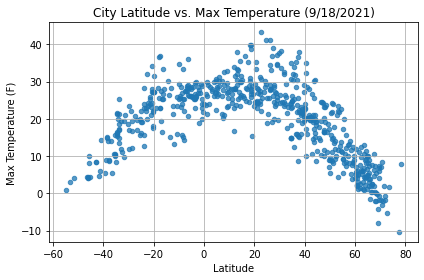

Analysis: 
The closer we are to the equator (0 degrees Latitude) the hotter it is.
We see this as the graph forms a parabolic structure, climbing and then coming back down.
This is because the earth is on a tilt and the equator is the closest point to the sun.


In [141]:
# These plots ask for current date of analysis so I'm declaring here to use throughout.
today = "(9/18/2021)"

weather_df.plot.scatter(x = 'Lat', y = 'Max Temp', grid = True, alpha = 0.75, 
                        xlabel = "Latitude", ylabel = "Max Temperature (F)", 
                        title = f'City Latitude vs. Max Temperature {today}')
plt.tight_layout()
plt.show()

print('''Analysis: 
The closer we are to the equator (0 degrees Latitude) the hotter it is.
We see this as the graph forms a parabolic structure, climbing and then coming back down.
This is because the earth is on a tilt and the equator is the closest point to the sun.''')

## Latitude vs. Humidity Plot

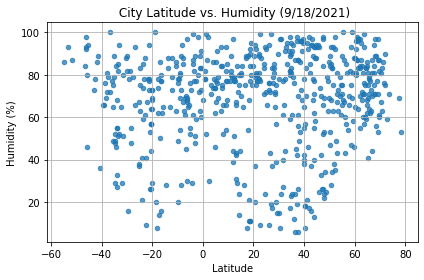

Analysis:
Nearly the full spread of diffrent humidities (from 0 to 100) occurred at every latitude
as we see points spread throughout the graph; however, it does seem that towards the extreme
latitudes (closer to the edges, -60 and 60 respectively) that the cities 
will experience higher average levels of humidity.


In [144]:
weather_df.plot.scatter(x = 'Lat', y = 'Humidity', grid = True, alpha = 0.75, 
                        xlabel = "Latitude", ylabel = "Humidity (%)", 
                        title = f' City Latitude vs. Humidity {today}')
plt.tight_layout()
plt.show()

print('''Analysis:
Nearly the full spread of diffrent humidities (from 0 to 100) occurred at every latitude
as we see points spread throughout the graph; however, it does seem that towards the extreme
latitudes (closer to the edges, -60 and 60 respectively) that the cities 
will experience higher average levels of humidity.''')

## Latitude vs. Cloudiness Plot

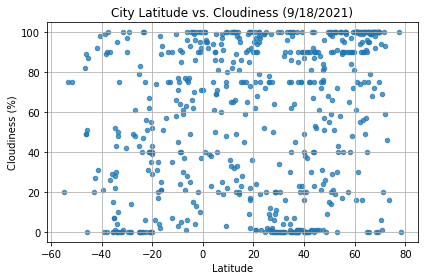

Analysis:
Latitude doesn't seem to have much of a relationship to a city's cloudiness,
This is evident as the graph has values spread throughout. 
Clusters of points at the top and bottom imply that it is cities either 
experience consistent cloudiness or none at all.
Others factors may be at play such as a city's elevation or proximity to water.


In [146]:
weather_df.plot.scatter(x = 'Lat', y = 'Cloudiness', grid = True, alpha = 0.75, 
                        xlabel = "Latitude", ylabel = "Cloudiness (%)", 
                        title = f'City Latitude vs. Cloudiness {today}')
plt.tight_layout()
plt.show()

print('''Analysis:
Latitude doesn\'t seem to have much of a relationship to a city\'s cloudiness,
This is evident as the graph has values spread throughout. 
Clusters of points at the top and bottom imply that it is cities either 
experience consistent cloudiness or none at all.
Others factors may be at play such as a city\'s elevation or proximity to water.''')

## Latitude vs. Wind Speed Plot

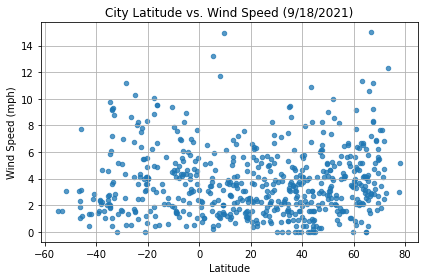

In [112]:
weather_df.plot.scatter(x = 'Lat', y = 'Wind Speed', grid = True, alpha = 0.75, 
                        xlabel = "Latitude", ylabel = "Wind Speed (mph)", 
                        title = f'City Latitude vs. Wind Speed {today}')
plt.tight_layout()
plt.show()

print('''Analysis:
Nearly the full spread of diffrent humidities (from 0 to 100) occurred at every latitude
as we see points spread throughout the graph; however, it does seem that towards the extreme
latitudes (closer to the edges, -60 and 60 respectively) that the cities 
will experience higher average levels of humidity.''')

## Linear Regression

In [133]:
# The rest of the problems want to be separated by the Northern or Hemisphere of the globe.
# To do this we cut off at 0 degrees latitude.
# Creating dataframes to easily pull the data into the graphs.

northern_df = weather_df[weather_df['Lat']>=0]
southern_df = weather_df[weather_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

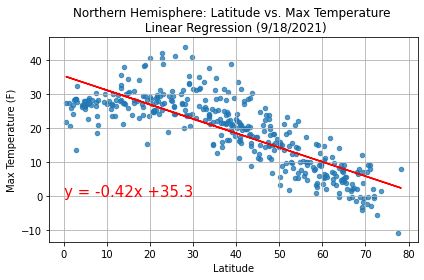

Correlation coeffecient [R-Value] is -0.81


In [125]:
# Finding the linear regression information.
(slope, intercept, rvalue, _, _) = linregress(northern_df['Lat'],northern_df['Max Temp'])

# Creating the best fit line to be overlaid on the graph later.
fit = slope*northern_df['Lat']+intercept

# Creating the intial scatterplot.
northern_df.plot.scatter(x = 'Lat', y = 'Max Temp', grid = True, alpha = 0.75, 
                        xlabel = "Latitude", ylabel = "Max Temperature (F)", 
                         title = f'Northern Hemisphere: Latitude vs. Max Temperature \n Linear Regression {today}')

# Adding the best line over the graph.
plt.plot(northern_df['Lat'], fit ,"-", color = "red")

# Overlaying the equation for the line in a clean to read manner.
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', 
[0, 0], color = 'red', fontsize = 15)

# Cleaning up the image and printing the r-value.
plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

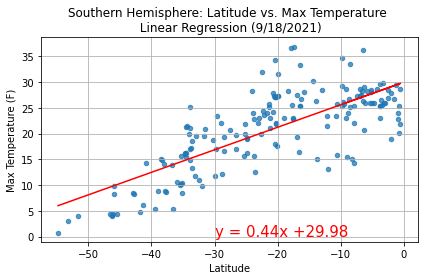

Correlation coeffecient [R-Value] is 0.76


In [134]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(southern_df['Lat'],southern_df['Max Temp'])
fit = slope*southern_df['Lat']+intercept


southern_df.plot.scatter(x = 'Lat', y = 'Max Temp', grid = True, alpha = 0.75, 
                        xlabel = "Latitude", ylabel = "Max Temperature (F)", 
                         title = f'Southern Hemisphere: Latitude vs. Max Temperature \n Linear Regression {today}')

plt.plot(southern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', 
[-30, 0], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

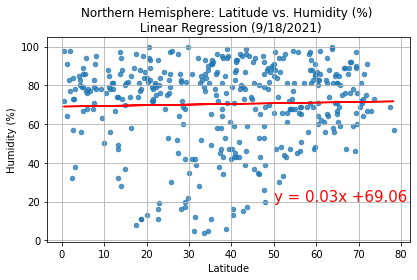

Correlation coeffecient [R-Value] is 0.03


In [127]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(northern_df['Lat'],northern_df['Humidity'])
fit = slope*northern_df['Lat']+intercept


northern_df.plot.scatter(x = 'Lat', y = 'Humidity', grid = True, alpha = 0.75, 
                        xlabel = "Latitude", ylabel = "Humidity (%)", 
                         title = f'Northern Hemisphere: Latitude vs. Humidity (%) \n Linear Regression {today}')

plt.plot(northern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', [50, 20], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

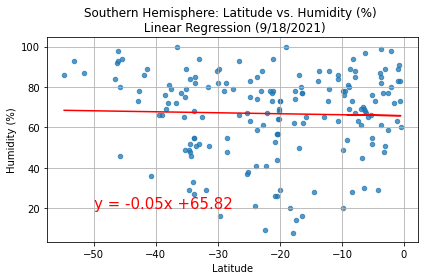

Correlation coeffecient [R-Value] is -0.03


In [135]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(southern_df['Lat'],southern_df['Humidity'])
fit = slope*southern_df['Lat']+intercept


southern_df.plot.scatter(x = 'Lat', y = 'Humidity', grid = True, alpha = 0.75, 
                        xlabel = "Latitude", ylabel = 'Humidity (%)', 
                         title = f'Southern Hemisphere: Latitude vs. Humidity (%) \n Linear Regression {today}')

plt.plot(southern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', [-50, 20], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

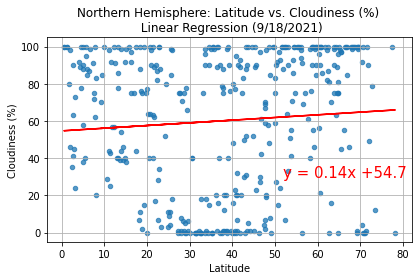

Correlation coeffecient [R-Value] is 0.08


In [129]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(northern_df['Lat'],northern_df['Cloudiness'])
fit = slope*northern_df['Lat']+intercept


northern_df.plot.scatter(x = 'Lat', y = 'Cloudiness', grid = True, alpha = 0.75, 
                        xlabel = "Latitude", ylabel = "Cloudiness (%)", 
                         title = f'Northern Hemisphere: Latitude vs. Cloudiness (%) \n Linear Regression {today}')

plt.plot(northern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', [52, 30], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

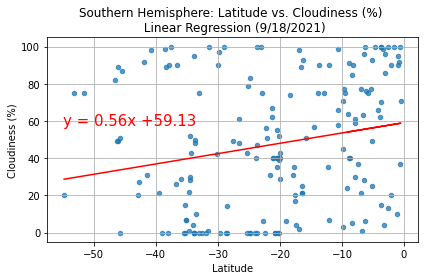

Correlation coeffecient [R-Value] is 0.22


In [136]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(southern_df['Lat'],southern_df['Cloudiness'])
fit = slope*southern_df['Lat']+intercept


southern_df.plot.scatter(x = 'Lat', y = 'Cloudiness', grid = True, alpha = 0.75, 
                        xlabel = "Latitude", ylabel = "Cloudiness (%)", 
                         title = f'Southern Hemisphere: Latitude vs. Cloudiness (%) \n Linear Regression {today}')

plt.plot(southern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', [-55, 58], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

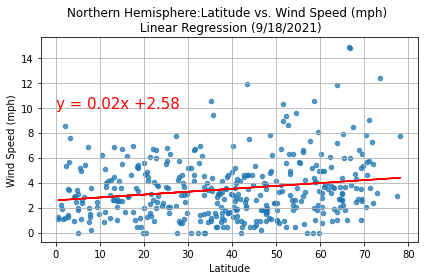

Correlation coeffecient [R-Value] is 0.19


In [131]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(northern_df['Lat'],northern_df['Wind Speed'])
fit = slope*northern_df['Lat']+intercept


northern_df.plot.scatter(x = 'Lat', y = 'Wind Speed', grid = True, alpha = 0.75, 
                        xlabel = "Latitude", ylabel = "Wind Speed (mph)", 
                         title = f'Northern Hemisphere:Latitude vs. Wind Speed (mph) \n Linear Regression {today}')

plt.plot(northern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', [0, 10], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

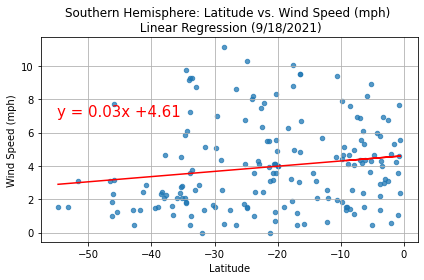

Correlation coeffecient [R-Value] is 0.16


In [137]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(southern_df['Lat'],southern_df['Wind Speed'])
fit = slope*southern_df['Lat']+intercept


southern_df.plot.scatter(x = 'Lat', y = 'Wind Speed', grid = True, alpha = 0.75, 
                        xlabel = "Latitude", ylabel = "Wind Speed (mph)", 
                         title = f'Southern Hemisphere: Latitude vs. Wind Speed (mph) \n Linear Regression {today}')

plt.plot(southern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', [-55, 7], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')